# kNN своими руками



In [329]:
import numpy as np
from __future__ import division
from scipy.spatial.distance import euclidean as E
from scipy.spatial.distance import cityblock as M
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import math

In [330]:
class KNN:
    def __init__(self, metric='euclid', k=5):
        self.metric = metric
        self.k = k
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        self.X_train=X_train
        self.y_train=y_train
        return self
        
    def predict(self, X_test):
        y_pred=[]
        if self.metric == 'euclid':
            for i in range(X_test.shape[0]):
                y_pred_ch=0
                y_pred_znam=0
                new_X_train=self.X_train
                new_y_train=self.y_train
                for k in range(self.k):
                    ind=np.array([E(X_test[i,:],new_X_train[j,:]) for j in range(new_X_train.shape[0])]).argmin()
                    w = 1/(E(X_test[i,:],new_X_train[ind,:]))
                    y_pred_ch += w * new_y_train[ind]
                    y_pred_znam += w
                    new_X_train=np.delete(new_X_train,ind,0)
                    new_y_train=np.delete(new_y_train,ind,0)

                y_pred.append(y_pred_ch/y_pred_znam) 
            return y_pred
        
        
        if self.metric=='manhattan':
            for i in range(X_test.shape[0]):
                y_pred_ch=0
                y_pred_znam=0
                new_X_train=self.X_train
                new_y_train=self.y_train
                for k in range(self.k):
                    ind=np.array([M(X_test[i,:],new_X_train[j,:]) for j in range(new_X_train.shape[0])]).argmin()
                    w = 1/(M(X_test[i,:],new_X_train[ind,:]))
                    y_pred_ch += w * new_y_train[ind]
                    y_pred_znam += w
                    new_X_train=np.delete(new_X_train,ind,0)
                    new_y_train=np.delete(new_y_train,ind,0)

                y_pred.append(y_pred_ch/y_pred_znam) 
            return y_pred

In [331]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [332]:
knn=KNN() #new model  metric='euclid'
knn.fit(X_train,y_train)
print('Test MSE:', mean_squared_error(knn.predict(X_test), y_test)) 

Test MSE: 1.143364989935662


In [333]:
new_knn=KNeighborsRegressor(weights ='distance') # sklearn model metric='euclid'
new_knn.fit(X_train,y_train)
print('Test MSE:',mean_squared_error(new_knn.predict(X_test),y_test))

Test MSE: 1.143364989935662


In [334]:
knn=KNN(metric='manhattan') #new model  metric='manhattan'
knn.fit(X_train,y_train)
print('Test MSE:', mean_squared_error(knn.predict(X_test), y_test)) 

Test MSE: 1.1768254941187883


In [335]:
new_knn=KNeighborsRegressor(weights ='distance',p=1)# sklearn model metric='manhattan'
new_knn.fit(X_train,y_train)
print('Test MSE:',mean_squared_error(new_knn.predict(X_test),y_test))

Test MSE: 1.1768254941187883


# Линейная регрессия своими руками

In [336]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        self.X_train=X_train
        self.y_train=y_train
        u_now = np.zeros(X_train.shape[1])
        self.w=[]
        self.loss_history=[]
        for step in range(self.max_iter):
            self.w.append(u_now)
            grad = self.calc_gradient(self.X_train,self.y_train,u_now)
            u_new = u_now - self.eta*grad
            self.loss_history.append(self.calc_loss_for_each_iteration(X_train, y_train,u_new))
            if np.linalg.norm(u_new - u_now) <= self.tol:
                self.w.append(u_new)
                break
            u_now = u_new    
        return self.w
        
    def predict(self, X_test):
        y_pred = np.dot(X_test, np.array(self.w)[-1])
        return y_pred
        
    
    def calc_gradient(self, X, y,u_now):
       
        grad=[] # все значения градиента, размером равный вектору весов
        which_h_loss_func =[]
        
        for i in range(X.shape[0]):
            if(abs(y[i] - np.dot(X[i,:],u_now))) <= self.delta:
                which_h_loss_func.append(0)
            else:
                which_h_loss_func.append(1)
                
                
        self.which_h_loss_func = which_h_loss_func
        for w in range(u_now.shape[0]):
            w_d = 0
            for l in range(X.shape[0]):
                if which_h_loss_func[l] == 0:
                    w_d += -X[l][w] * (y[l] - np.dot(X[l],u_now))
                elif which_h_loss_func[l] == 1:
                    w_d += -X[l][w] * np.sign(y[l] - np.dot(X[l],u_now))
            grad.append(w_d / X.shape[0]) 
            
        return np.array(grad)
    
    
    
    def calc_loss(self, X, y):
        
        loss = 0
        for l in range(X.shape[0]):
            con = y[l] - np.dot(X[l], np.array(self.w)[-1])
            if con <= self.delta:
                loss += con**2
            else:
                loss += self.delta*abs(con) - 1/2 * (self.delta)**2           
        loss = loss / X.shape[0]
        return loss
    def calc_loss_for_each_iteration(self, X, y,u_new):
        loss = 0
        for l in range(X.shape[0]):
            con = y[l] - np.dot(X[l], u_new)
            if con <= self.delta:
                loss += con**2
            else:
                loss += self.delta*abs(con) - 1/2 * (self.delta)**2
           
                    
        loss = loss / X.shape[0]
        return loss

In [337]:
lg = LinearRegressionHuber() #new model with mse
lg.fit(X_train,y_train)
pr_test = lg.predict(X_test)
mean_squared_error(pr_test,y_test)


1.0919500874768941

In [338]:
lg.calc_loss(X_test,y_test) #huber loss on test data

0.795043797156744

In [339]:
pr_train =  lg.predict(X_train) #huber loss on train data
lg.calc_loss(X_train,y_train)

0.7489597471571857

In [340]:
from sklearn.linear_model import HuberRegressor # sklearn model with mse
huber = HuberRegressor(epsilon =1.0, max_iter=1000, tol=1e-6, alpha=1e-2).fit(X_train, y_train)
mean_squared_error(huber.predict(X_test),y_test)

1.1002612941038246

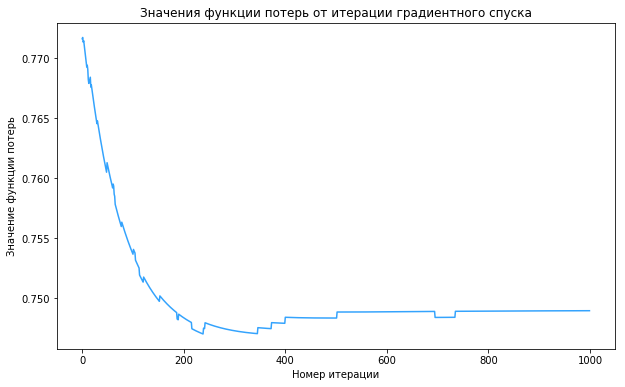

In [341]:
plt.figure(figsize = (10,6))
plt.plot(range(lg.max_iter),lg.loss_history, '#34a3fd')
plt.title('Значения функции потерь от итерации градиентного спускa')
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции потерь')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()


In [342]:
# your code here

# Практика

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge , LassoCV,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score , KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, OneHotEncoder,LabelEncoder
import math

%matplotlib inline

https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [41]:
data = pd.read_csv('train.csv', header=0)

In [42]:
 data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [43]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
data.drop('Id', axis=1, inplace=True)

In [45]:
# выделим ответы из файлы
y_train = data['SalePrice']
data.drop('SalePrice', axis=1,inplace = True)

In [46]:
data.shape

(1460, 79)

In [47]:
p = data.columns[data.isna().any()].tolist() #столбцы, содержащие пропуски
p

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [48]:
s=data.isnull().sum(axis=0)
s=s[s!=0]
s1=s/data.shape[0]
pd.DataFrame({'Number of zeros':s,'Proportion of zeros':s1})

,Number of zeros,Proportion of zeros
LotFrontage,259,0.177397
Alley,1369,0.937671
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685


In [49]:
data.drop('Alley',inplace=True,axis=1) #Имеет больше 90% пропусков.Удалим столбец
data['MasVnrType'].fillna('None',inplace=True) #nan означает, что облицовки нет, поэтому пустые значения добавляем к классу 'None'
data['MasVnrArea'].fillna(0,inplace=True) #Облицовки нет, поэтому и размер ее 0 
data['BsmtQual'].fillna('None',inplace=True) #можно увидеть, что если в данном столбце есть пропуск, то пропуск будет так же и в следующих 2х колонках. Следовательно подвала просто не существует в этих домах
data['BsmtCond'].fillna('None',inplace=True)
data['BsmtExposure'].fillna('None',inplace=True) # в 37 случаях, если basement exposure == nan,то это значит, что не существует и basement, но в одном случае в basement exposure стоит nan, а в столбцах basementQuality и  basement condition не nan, поэтому там существует basement, а значит не существует exposure, поэтому заполняем этот пропуск, как 'No'
data['BsmtExposure'].fillna('None',inplace=True) # во всех остальных случаях в столбцах BsmtQual и BsmtCond nan.Следовательно,  подвала нет 
data['BsmtFinType1'].fillna('None',inplace=True) # No basement
data['BsmtFinType2'].fillna('None',inplace=True) # No basement
data['Electrical'].fillna('None',inplace=True) #No electricity
data['FireplaceQu'].fillna('None',inplace=True) #Fireplace
data['GarageType'].fillna('None',inplace=True) # no garage
data['GarageYrBlt'].fillna(0,inplace=True) # no garage
data['GarageFinish'].fillna('None',inplace=True) # no garage
data['GarageQual'].fillna('None',inplace=True) # no garage
data['GarageCond'].fillna('None',inplace=True) # no garage
data.drop('PoolQC',inplace=True,axis=1)  #No pool
data.drop('Fence',inplace=True,axis=1) #Имеет больше 80% пропусков.Удалим столбец
data.drop('MiscFeature',inplace=True,axis=1) # Имеет больше 90% пропусков.Удалим столбец
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True) #должно быть в любом доме, следовательно, это ошибка и пропуска быть не должно было, заменим медианой
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)  # то же самое с электричеством, поэтому заменим самым популярным значением из выборки, потому что у людей, живущих неподалеку, примерно одинаковые благосостояние и дома

In [50]:
data.isnull().any().any()

False

In [51]:
# применим o label encoding, чтобы перевести все строчные призаки в цифры
categorical_features=data.select_dtypes(include = ['object']).columns
le=LabelEncoder()
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
for i in categorical_features:
    le.fit(data[i])
    data[i] = le.transform(data[i])
data    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4
5,50,3,85.0,14115,1,0,3,0,4,0,...,30,0,320,0,0,700,10,2009,8,4
6,20,3,75.0,10084,1,3,3,0,4,0,...,57,0,0,0,0,0,8,2007,8,4
7,60,3,69.0,10382,1,0,3,0,0,0,...,204,228,0,0,0,350,11,2009,8,4
8,50,4,51.0,6120,1,3,3,0,4,0,...,0,205,0,0,0,0,4,2008,8,0
9,190,3,50.0,7420,1,3,3,0,0,0,...,4,0,0,0,0,0,1,2008,8,4


In [52]:
# для применения линейных алгоритмов метод label encoding не годиться,потому что создается ложная алгебраическая зависимость между значениями, над которыми мы работаем -  применяем one-hot-encoding 
for i in categorical_features:
    ohe = OneHotEncoder(sparse=False)
    new_ohe_features = ohe.fit_transform(data[i].values.reshape(-1,1))
    tmp = pd.DataFrame(new_ohe_features,columns=[ str(i) + '=' + str(j) for j in range(new_ohe_features.shape[1])])
    data=pd.concat([data,tmp],axis=1)
data  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType=5,SaleType=6,SaleType=7,SaleType=8,SaleCondition=0,SaleCondition=1,SaleCondition=2,SaleCondition=3,SaleCondition=4,SaleCondition=5
0,60,3,65.0,8450,1,3,3,0,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,3,80.0,9600,1,3,3,0,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,3,68.0,11250,1,0,3,0,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,3,60.0,9550,1,0,3,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,3,84.0,14260,1,0,3,0,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,50,3,85.0,14115,1,0,3,0,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,20,3,75.0,10084,1,3,3,0,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,60,3,69.0,10382,1,0,3,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,50,4,51.0,6120,1,3,3,0,4,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,190,3,50.0,7420,1,3,3,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
data.drop(categorical_features, axis=1,inplace = True)

In [54]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType=5,SaleType=6,SaleType=7,SaleType=8,SaleCondition=0,SaleCondition=1,SaleCondition=2,SaleCondition=3,SaleCondition=4,SaleCondition=5
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType=5,SaleType=6,SaleType=7,SaleType=8,SaleCondition=0,SaleCondition=1,SaleCondition=2,SaleCondition=3,SaleCondition=4,SaleCondition=5
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,-0.051283,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,-0.039952,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,-0.022686,0.165692,-0.025899,-0.128187,-0.043861,-0.011783,-0.013748,-0.009535,-0.081539,0.162205
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,-0.017825,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.035715,-0.087162,-0.013098,0.036178,0.048347,-0.015130,-0.026277,-0.007929,0.041207,-0.085761


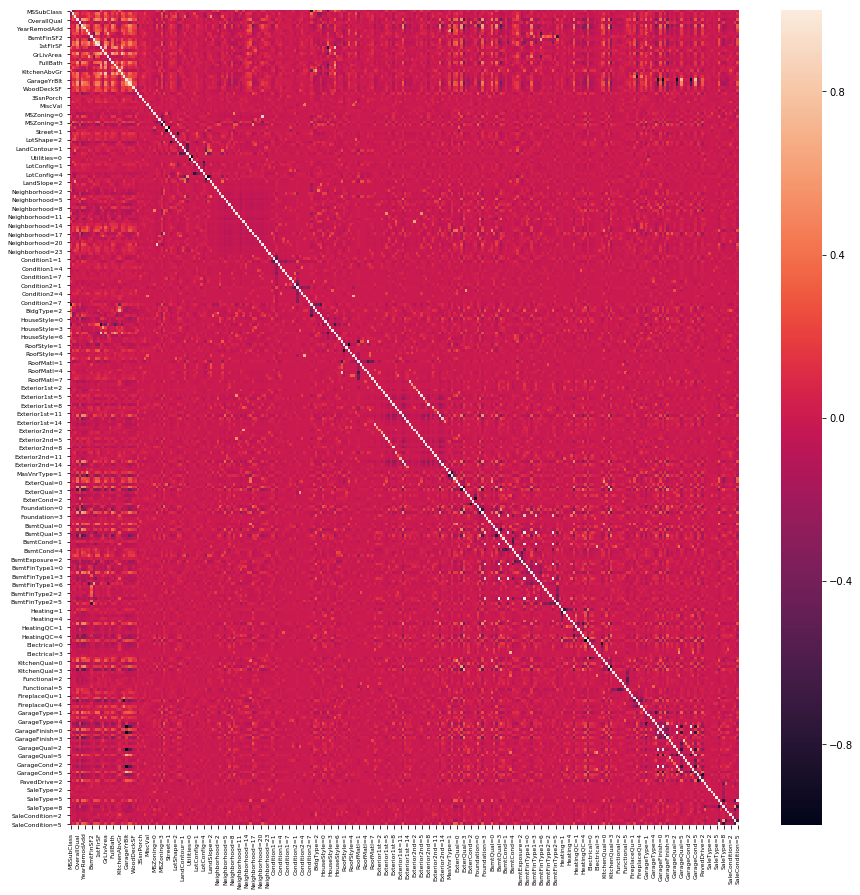

In [56]:
plt.figure(figsize = (15,15))
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=6)
sns.heatmap(data.corr()) 

Большинство признаков почти не коррелируют между собой 
Полностью положительно коррелирующих признаков очень мало. Но они есть, поэтому от них надо будет избавиться в дальнешем.
То же самое и с сильно отрицательно коррелирующими признаками. Есть, но мало. Также отметил, что большинство сильно отрицательно коррелирующими признаков

In [57]:
corr_df = abs(pd.concat([data, y_train], axis=1, keys=['data', 'y_train']).corr().loc['y_train', 'data'])
corr_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType=5,SaleType=6,SaleType=7,SaleType=8,SaleCondition=0,SaleCondition=1,SaleCondition=2,SaleCondition=3,SaleCondition=4,SaleCondition=5
SalePrice,0.084284,0.334771,0.263843,0.790982,0.077856,0.522897,0.507101,0.472614,0.38642,0.011378,...,0.027475,0.357509,0.034895,0.242598,0.118069,0.050686,0.015525,0.04648,0.15399,0.35206


In [58]:
df = pd.DataFrame({ 'Min' : corr_df.loc['SalePrice']})
a = df['Min'].min()
df[df['Min'] == a]

,Min
BsmtFinType2=2,0.000076


In [59]:
df = pd.DataFrame({ 'Max' : corr_df.loc['SalePrice']})
a = df['Max'].max()
df[df['Max'] == a]

,Max
OverallQual,0.790982


[Text(0,0,'-1'),
 Text(0,0,'0'),
 Text(0,0,'200000'),
 Text(0,0,'400000'),
 Text(0,0,'600000')]

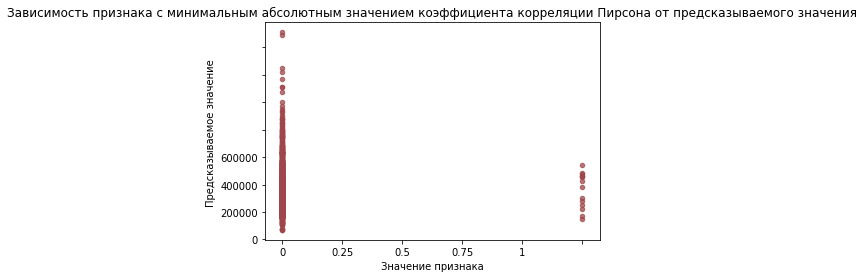

In [60]:
_, ax = plt.subplots()
ax.scatter(data['BsmtFinType2=2'], y_train, s = 20, alpha = 0.75, color='#9f464a')
ax.set_title('Зависимость признака с минимальным абсолютным значением коэффициента корреляции Пирсона от предсказываемого значения') 
ax.set_xlabel('Значение признака')
ax.set_ylabel('Предсказываемое значение ')
ax.set_xticklabels ([-1,0,0.25,0.5,0.75,1],fontsize = 10)
ax.set_yticklabels ([-1,0,200000,400000,600000],fontsize = 10)

[Text(0,0,'-1'),
 Text(0,0,'0'),
 Text(0,0,'200000'),
 Text(0,0,'400000'),
 Text(0,0,'600000')]

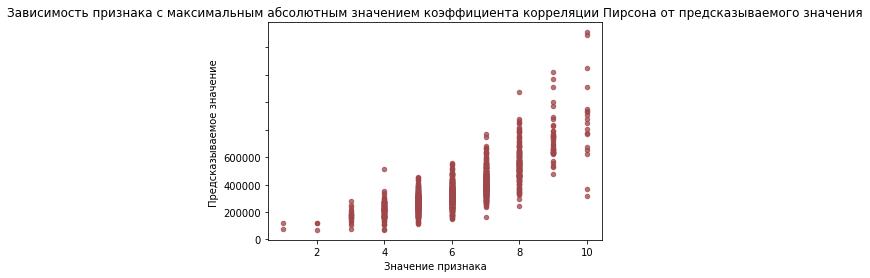

In [61]:
_, ax = plt.subplots()
ax.scatter(data['OverallQual'], y_train, s = 20, alpha = 0.75, color='#9f464a')
ax.set_title('Зависимость признака с максимальным абсолютным значением коэффициента корреляции Пирсона от предсказываемого значения') 
ax.set_xlabel('Значение признака')
ax.set_ylabel('Предсказываемое значение ')
ax.set_xticklabels ([0,2,4,6,8,10],fontsize = 10)
ax.set_yticklabels ([-1,0,200000,400000,600000],fontsize = 10)

<function matplotlib.pyplot.show(*args, **kw)>

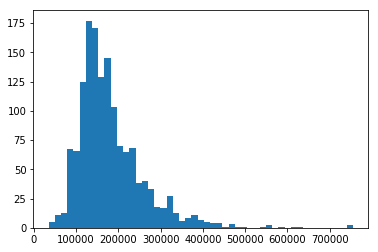

In [62]:
plt.hist(y_train, bins='auto') 
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

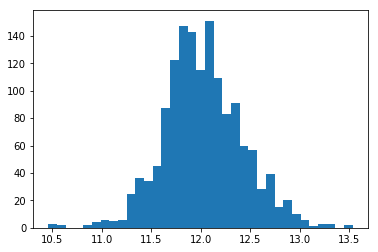

In [63]:
plt.hist(np.log1p(y_train), bins='auto') 
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show

Мы видим что данные теперь лежат намного более в узком диапазоне. Ассиметричные данные стали более симметричны,тк логарифмирование собирает вместе слишком малые значения, а также слишком большие. Таким образом мы сделали данные приблизительно нормально распределенными.

In [64]:
y_train = np.log1p(y_train)

In [65]:
X_train, X_val, y_train, y_val = train_test_split(data, y_train, random_state=17032019)

In [66]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 286), (365, 286), (1095,), (365,))

#### KNeighborsRegressor

In [433]:
knn_regression = KNeighborsRegressor()

In [434]:
#cross_val_score for KNeighborsRegressor
kf = KFold(n_splits=7, shuffle=True, random_state=42)
params = {'n_neighbors': np.arange(1, 401, 2), 'weights': ['uniform', 'distance'],'p':[1,2]}
clf = GridSearchCV(knn_regression, params, cv=kf, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)
clf.best_params_, clf.best_score_

({'n_neighbors': 7, 'p': 1, 'weights': 'distance'}, -0.04095768708052323)

In [442]:
knn1 = KNeighborsRegressor(n_neighbors= 7, p = 1, weights= 'distance')
knn1.fit(X_train,y_train)
math.sqrt(mean_squared_error(knn1.predict(X_val), y_val))

0.19635511167048114

#### Линейная регрессия


In [425]:
lr = LinearRegression()

In [426]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
paramslr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr,paramslr, cv=kf,scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'copy_X': True, 'fit_intercept': False, 'normalize': True},
 -0.026669821160214907)

In [427]:
lr1 = LinearRegression(copy_X= True, fit_intercept= True, normalize=False)
lr1.fit(X_train,y_train)
math.sqrt(mean_squared_error(lr1.predict(X_val), y_val))

0.139320110451377

#### Lasso

In [69]:
    
lasso = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,0.3, 0.6, 1], tol=0.0001, max_iter=50000, cv=10, normalize=False)
lasso.fit(X_train,y_train)
math.sqrt(mean_squared_error(lasso.predict(X_val), y_val))   

0.1202841796365605

#### Ridge

In [429]:
ridge = RidgeCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], cv=10)
ridge.fit(X_train, y_train)
math.sqrt(mean_squared_error(ridge.predict(X_val), y_val))

0.13637903281004626

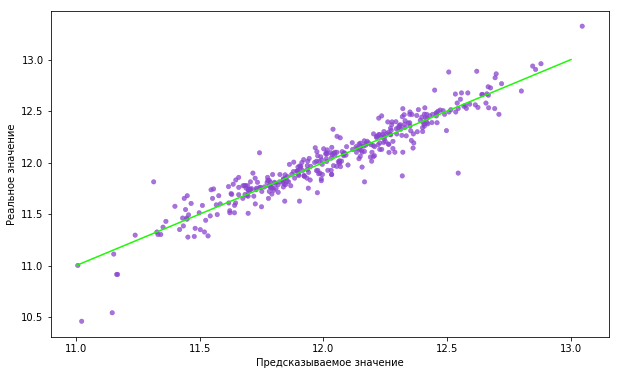

In [120]:
_, ax = plt.subplots(figsize=(10,6))
ax.scatter(lasso.predict(X_val), y_val, s = 20, alpha = 0.75, color='#8A45D0',linewidths=(0.5,0.5))
ax.set_xlabel('Предсказываемое значение')
ax.set_ylabel('Реальное значение')
plt.plot(np.arange(11,14), np.arange(11,14),'#1EF705')
plt.show()

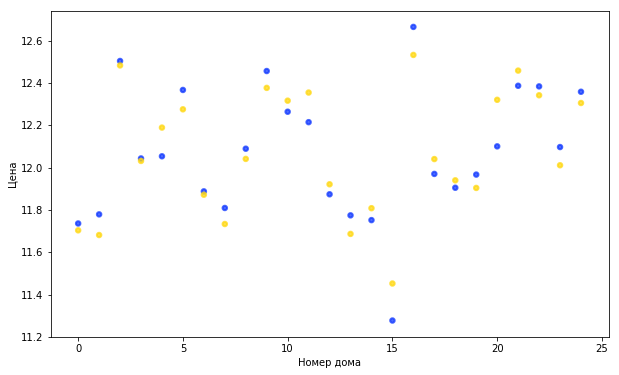

In [137]:
_, ax = plt.subplots(figsize=(10,6))
ax.scatter(np.arange(25), y_val[:25], s = 20, alpha = 0.75, color='#1139FF',linewidths=(2,2))
ax.scatter(np.arange(25), lasso.predict(X_val)[:25], s = 20, alpha = 0.75, color='#FFD811',linewidths=(2,2))
ax.set_xlabel('Номер дома')
ax.set_ylabel('Цена')
plt.show()
#синие точки - реальные значенияцены
#желтые точки - предсказываемые

In [128]:
y_val[:10]

1334    11.736077
839     11.779136
157     12.504327
1097    12.043560
1251    12.053801
1390    12.367345
656     11.887938
1214    11.809327
314     12.089544
1413    12.456835
Name: SalePrice, dtype: float64

In [36]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType=5', 'SaleType=6', 'SaleType=7', 'SaleType=8',
       'SaleCondition=0', 'SaleCondition=1', 'SaleCondition=2',
       'SaleCondition=3', 'SaleCondition=4', 'SaleCondition=5'],
      dtype='object', length=286)

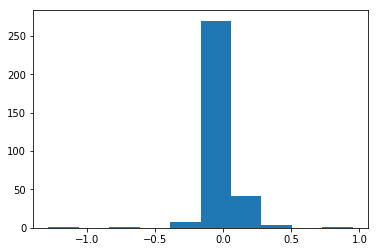

In [430]:
plt.hist(lr1.coef_)  #линейная регрессия
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

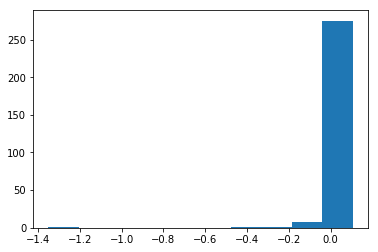

In [431]:
#Lasso
plt.hist(lasso.coef_)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

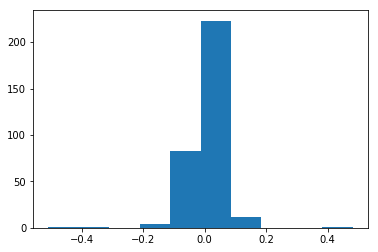

In [432]:
plt.hist(ridge.coef_) #Ridge
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

Лучший результат показывает алгоритм Lasso
Заметим, что в этом методе наибольшее количество нулевых весов. В Ridge и линейной регрессии нулевых весов нет или очень мало, результат на тестовых данных хуже. Это означает, что очень многие признаки не значимы в действительности.

*(your solution here)*

## 2* (0.5)

Гарри Поттер хочет найти философский камень, расположенный в точке минимума функции $f(x_1, x_2)=x_1^2 + x_2^2$. В момент времени 0 он стартует из точки $x^{(0)}=(2, 2)$. На $i$-й минуте Гарри мгновенно перемещается (аппарирует) из точки $x^{(i)}$ в точку

$$
x^{(i+1)} = x^{(i)} - \eta \nabla f(x^{(i)}),
$$

где $\nabla f(x^{(i)})$ — градиент $f$ в точке $x^{(i)}$, $\eta \ge 0$ — фиксированное число. Опишите судьбу Гарри в зависимости от значения $\eta$. При каких значениях $\eta$ Гарри подойдёт к философскому камню сколь угодно близко? Сколько итераций ему понадобится, чтобы подойти к философскому камню на расстояние не больше $\varepsilon$?

*(your solution here)*

## 3* (0.5)

Рассмотрим задачу обучения линейной регрессии:

$$
Q(w) = \frac{1}{2}(y - Xw)^T(y - Xw) \to \min_w
$$

Будем решать ее с помощью градиентного спуска. Допустим, мы находимся на некоторой итерации $k$ и хотим выполнить очередной шаг

$$
w^{(k)} = w^{(k - 1)} - \eta\nabla_wQ\left(w^{(k - 1)}\right)
$$

При известных $y$, $X$ и $w^{(k - 1)}$ найдите длину шага $\eta$, при которой уменьшение значения функционала будет наибольшим:

$$
Q\left(w^{(k - 1)} - \eta\nabla_wQ\left(w^{(k - 1)}\right)\right) \to \min_\eta
$$

*Примечание 1. $\nabla_wQ = -X^T\left(y - Xw\right)$.*

*Примечание 2. Для получения лаконичного ответа вам, возможно, поможет следующее свойство скалярного произведения. Пусть $x_1$, $x_2$ - вектора, а $A$ - матрица. Тогда выполняется равенство:*

$$
\langle x_1, Ax_2\rangle = \langle A^Tx_1, x_2\rangle
$$

*Это верно потому, что $\langle x_1, Ax_2\rangle = x_1^TAx_2 = \left(A^Tx_1\right)^Tx_2 = \langle A^Tx_1, x_2\rangle$.*

*(your solution here)*